# Fit a function with Gradient Descent
Let's pick a simple function $y$ defined as

$y = 2x$

and generate a sample data:






In [1]:
from pylab import *
import pandas as pd

x = [1,2,3]
y = [2*xx for xx in x]
data = {'x':x, 'y':y}

df = pd.DataFrame(data=data, index=x)
print("Training Data:")
df

Training Data:


x  y
1  1  2
2  2  4
3  3  6

Now let's pretend we don't know the generating function $y$. 
All we know about it is that $y$ is a linear function. 
So we can write it as:

$$y_{pred} = w*x$$



In [2]:
w = 1 # initialize the weight. but we will learn this weight in the process below.

# our model forward pass
# this is actually our y_pred as we defined above
def forward(x):
    return x * w

**Goal**:  use the training data above to find the parameter $w$. 

**Solution:** 
Loss function for our problem is:

$loss(w) = (y_{pred}-y)^2$

remembering the definition of $y_{pred} = w*x$ we can rewrite the loss function as


$loss(w) = ( w*x-y)^2$




# Define loss function

In [3]:
# Loss function
def loss(x, y):
    y_pred = forward(x) #Our previous function
    return (y_pred - y) * (y_pred - y) #loss function

To minimize the loss, we should compute the derivative of loss with respect to $w$ and interatively change $w$ to move in the direction of the descent:

![alt text](http://donsoft.io/deep-learning-with-rnns/images/gradient_descent_cropped.gif)


Derivative of loss with respect to $w$ is given by:

$$\frac{\partial loss}{\partial w } $$

$$=\frac{ \partial (w*x-y)^2}{\partial w }$$

$$=\frac{ 2 (w*x-y) \partial (w*x-y)}{\partial w } $$

$$= 2 x (w*x-y) $$

# Calculate the gradient

In [4]:
# compute gradient
# it contains the derivative of the loss function
def gradient(x, y):  # d_loss/d_w
    return 2 * x * (x * w - y) #derivative

before we start training let's see how our predictions look with the arbitrary weight $w=1$

## Before training

In [5]:
# predict the value of the predicted function at x = 4 before training
# Before training

print("predict (before training)")
print("input: 4")
print("model prediction (before training): ", forward(4), " -- correct answer: 2x4 = 8")

predict (before training)
input: 4
model prediction (before training):  4  -- correct answer: 2x4 = 8


#### Visualize training data vs predicted function values, before training:

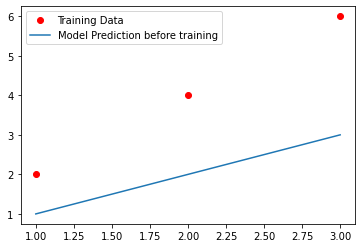

In [6]:
x_data = df['x']
y_data = df['y']
plot(x_data,y_data,'ro', label="Training Data")
plot(x_data,[forward(x) for x in x_data], label="Model Prediction before training")
legend()

#### Learning:
That's pretty bad!  Let's learn the predicting function $y_pred$ by learning the value of $w$. 

We will move $w$ according to this rule:

$w = w - learning\_rate * grad$

where $grad = \frac{\partial loss}{\partial w}$.

Let's pick a small step size as our learning rate:

$learning\_rate = 0.01$

and solve the problem using gradient descent in 10 iterations:


In [8]:
learning_rate = 0.01

# Training loop

for epoch in range(100): #n_epochs = 100
    for x_val, y_val in zip(x_data, y_data):
        
        # Compute gradient for every training data point
        grad = gradient(x_val, y_val)
        
        # Alter w based on grad and learning rate
        w = w - learning_rate * grad
        print("\tgrad: ", x_val, y_val, grad)
        
        # Calculate loss with the new w
        l = loss(x_val, y_val)

    print("progress:", epoch, "w=", w, "loss=", l)

	grad:  1 2 -2
	grad:  2 4 -7.84
	grad:  3 6 -16.2288
progress: 0 w= 1.260688 loss= 4.919240100095999
	grad:  1 2 -1.478624
	grad:  2 4 -5.796206079999999
	grad:  3 6 -11.998146585599997
progress: 1 w= 1.453417766656 loss= 2.688769240265834
	grad:  1 2 -1.093164466688
	grad:  2 4 -4.285204709416961
	grad:  3 6 -8.87037374849311
progress: 2 w= 1.5959051959019805 loss= 1.4696334962911515
	grad:  1 2 -0.8081896081960389
	grad:  2 4 -3.1681032641284723
	grad:  3 6 -6.557973756745939
progress: 3 w= 1.701247862192685 loss= 0.8032755585999681
	grad:  1 2 -0.59750427561463
	grad:  2 4 -2.3422167604093502
	grad:  3 6 -4.848388694047353
progress: 4 w= 1.7791289594933983 loss= 0.43905614881022015
	grad:  1 2 -0.44174208101320334
	grad:  2 4 -1.7316289575717576
	grad:  3 6 -3.584471942173538
progress: 5 w= 1.836707389300983 loss= 0.2399802903801062
	grad:  1 2 -0.3265852213980338
	grad:  2 4 -1.2802140678802925
	grad:  3 6 -2.650043120512205
progress: 6 w= 1.8792758133988885 loss= 0.13116896307449


## After learning
Let's see how well we are doing in prediction a single value of the function after training for 10 steps:

Looks really promising! 
Let's look at the predicted function over all values in the training range:

predict (after training)
input: 4
model prediction (after training):  7.9999999999996945  -- correct answer: 8


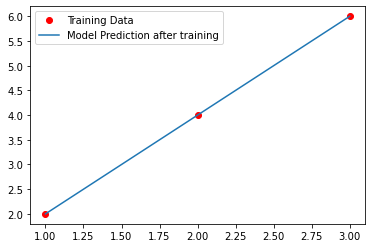

In [9]:
# After training

print("predict (after training)")
print("input: 4")
print("model prediction (after training): ", forward(4), " -- correct answer: 8")

plot(x_data,y_data,'ro', label="Training Data")
plot(x_data,[forward(x) for x in x_data], label="Model Prediction after training")
legend()

Hoorray! We have learned the desired function at a pretty good accuracy!

### Visualize the process

In [10]:
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import rcParams, animation, rc
from ipywidgets import interact, interactive, fixed
from ipywidgets.widgets import *
rc('animation', html='jshtml')
rcParams['figure.figsize'] = 3, 3
rcParams['animation.writer'] = 'html'


learning_rate = 0.01
w = 1 #initial weight
def upd():
    #Update the weight
    global w
    # compute gradient for every training data point
    grad = gradient(x_val, y_val)
    #alter w based on grad and learning rate
    w = w - learning_rate * grad

#Plot
fig = plt.figure(dpi=100, figsize=(5, 4))
plt.scatter(x_data,y_data)
line, = plt.plot(x_data,forward(x_data))
plt.close()

def animate(i):
    #animation plot per epoch
    global x_val, y_val
    for x_val, y_val in zip(x_data, y_data):
        line.set_ydata(forward(x_data))
        for i in range(30): 
            upd()
        
        return line,

ani = animation.FuncAnimation(fig, animate, np.arange(0, 15), interval=100)
ani

## Exercise I:

Repeat the above exercise for 

$y = x^2$ 

## Exercise II:
Use the above method for

$y = 5x+3$

**Hint:** 
You need to learn two values: $w$ and $b$. And your prediction function is

$y_{pred} = w*x + b$

and your gradient descent looks something like this:

![alt text](https://media.giphy.com/media/O9rcZVmRcEGqI/giphy.gif)